![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 25 - Introduction to NLP</center>
### <center> Bag of Words \& TF-IDF </center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/25_NLP/MainBoW.ipynb)

In [1]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size' : 16})

### Basic BoW example:
We first create some documents

In [2]:
lDocs = []
lDocs.append('This is the first sentence')
lDocs.append('This is the second')
lDocs.append('This that')
lDocs.append('Short Short sentence')
lDocs

['This is the first sentence',
 'This is the second',
 'This that',
 'Short Short sentence']

### BoW and TF-IDF:
We create BoW using `CountVectorizer`.

Note that `CountVectorizer` returns a sparse matrix

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

oBoW = CountVectorizer().fit(lDocs)
mBoW = oBoW.transform(lDocs)

print('BoW of words:')
print(mBoW.todense())
print('\n------------------------')
print('Vocabulary:')
sorted(oBoW.vocabulary_.items(), key=lambda item: item[1])

BoW of words:
[[1 1 0 1 0 0 1 1]
 [0 1 1 0 0 0 1 1]
 [0 0 0 0 0 1 0 1]
 [0 0 0 1 2 0 0 0]]

------------------------
Vocabulary:


[('first', 0),
 ('is', 1),
 ('second', 2),
 ('sentence', 3),
 ('short', 4),
 ('that', 5),
 ('the', 6),
 ('this', 7)]

#### TF-IDF:

In [4]:
from sklearn.feature_extraction.text import TfidfTransformer
np.set_printoptions(precision=3)

TfidfTransformer().fit_transform(mBoW).todense()

matrix([[0.553, 0.436, 0.   , 0.436, 0.   , 0.   , 0.436, 0.353],
        [0.   , 0.484, 0.614, 0.   , 0.   , 0.   , 0.484, 0.392],
        [0.   , 0.   , 0.   , 0.   , 0.   , 0.843, 0.   , 0.538],
        [0.   , 0.   , 0.   , 0.367, 0.93 , 0.   , 0.   , 0.   ]])

### Load IMDB Sentiment Analysis:
https://www.kaggle.com/kaushik3497/imdb-sentiment-analysis

In [5]:
N     = 5000
dData = pd.read_csv('labeledTrainData.tsv', delimiter='\t')
dData = dData[:N]
dData

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
4995,3720_2,0,Is this film a joke? Is it a comedy? Surely it...
4996,4229_10,1,Don't waste time reading my review. Go out and...
4997,8042_3,0,"The secret is...this movie blows. Sorry, but i..."
4998,9669_9,1,After reading the original play I thought it w...


In [6]:
#-- Display a full review:
idx = 212
idx = 9
dData['review'][idx]

'<br /><br />This movie is full of references. Like \\Mad Max II\\", \\"The wild one\\" and many others. The ladybug´s face it´s a clear reference (or tribute) to Peter Lorre. This movie is a masterpiece. We´ll talk much more about in the future."'

### Pre-processing:
* Remove HTML stuff.
* Remove punctuation and switch to lower case.
* Remove stop words and lemmatization (stemming)

In [7]:
import re
from   nltk.corpus import stopwords
from   nltk.stem   import WordNetLemmatizer
from   bs4         import BeautifulSoup  

oWordNetLemmatizer = WordNetLemmatizer()
sStopWords         = set(stopwords.words('english')) 

def PreprocessDoc(sRawText, printFlag=False):
    
    #-- Remove <br> and HTML:
    sText  = BeautifulSoup(sRawText).get_text()
    #-- Keep words and lower case:
    lWords = re.sub("[^a-zA-Z]", " ", sText).lower().split() 
    #-- Remove stop words and lemmatization (stemming):
    lStem = [oWordNetLemmatizer.lemmatize(word) for word in lWords if word not in sStopWords]   
    
    if printFlag == True:
        print('--------------')
        print('Original text:')
        print('--------------')
        print(sRawText)
        print('----------------------------------------------------------\n')

        print('---------------------')
        print('Remove <br> and HTML:')
        print('---------------------')
        print(sText)
        print('----------------------------------------------------------\n')

        print('--------------------------')
        print('Keep words and lower case:')
        print('--------------------------')
        print(lWords)
        print('----------------------------------------------------------\n')

        print('-------------------------')
        print('Remove stop words and lemmatization (stemming):')
        print('-------------------------')
        print(lStem)
        print('----------------------------------------------------------\n')

    return  " ".join(lStem)

def PreprocessDocs(lDocs):
    lNewDocs = []
    for ii in range(len(lDocs)):
        lNewDocs.append(PreprocessDoc(lDocs[ii]))
    return lNewDocs

In [8]:
PreprocessDoc(dData.review[idx], printFlag=True)

--------------
Original text:
--------------
<br /><br />This movie is full of references. Like \Mad Max II\", \"The wild one\" and many others. The ladybug´s face it´s a clear reference (or tribute) to Peter Lorre. This movie is a masterpiece. We´ll talk much more about in the future."
----------------------------------------------------------

---------------------
Remove <br> and HTML:
---------------------
This movie is full of references. Like \Mad Max II\", \"The wild one\" and many others. The ladybug´s face it´s a clear reference (or tribute) to Peter Lorre. This movie is a masterpiece. We´ll talk much more about in the future."
----------------------------------------------------------

--------------------------
Keep words and lower case:
--------------------------
['this', 'movie', 'is', 'full', 'of', 'references', 'like', 'mad', 'max', 'ii', 'the', 'wild', 'one', 'and', 'many', 'others', 'the', 'ladybug', 's', 'face', 'it', 's', 'a', 'clear', 'reference', 'or', 'tribute', '

'movie full reference like mad max ii wild one many others ladybug face clear reference tribute peter lorre movie masterpiece talk much future'

### Process the data:

In [9]:
lDocs = PreprocessDocs(dData['review'])
len(lDocs)

5000

### BoW:

In [10]:
minWordCount = 5 #-- ignore words with less than `minWordCount` occurrences
oBoW         = CountVectorizer(min_df=minWordCount)
mBoW         = oBoW.fit_transform(lDocs)
mBoW.shape

(5000, 10227)

In [11]:
mBoW

<5000x10227 sparse matrix of type '<class 'numpy.int64'>'
	with 446309 stored elements in Compressed Sparse Row format>

### Word could:

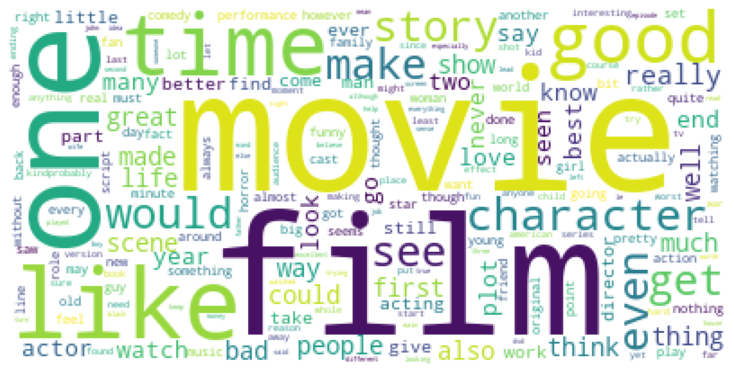

In [12]:
from wordcloud import WordCloud

vFreq  = np.sum(mBoW.toarray(), axis=0)
lWords = oBoW.get_feature_names()
Dict   = dict(zip(lWords, vFreq))

wordcloud = WordCloud(background_color='white').generate_from_frequencies(Dict) 

plt.figure(figsize=(10, 8)) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad=0) 
plt.show() 

#### Simple plot of the words' frequencies:
* Note that rare words might be the important ones.

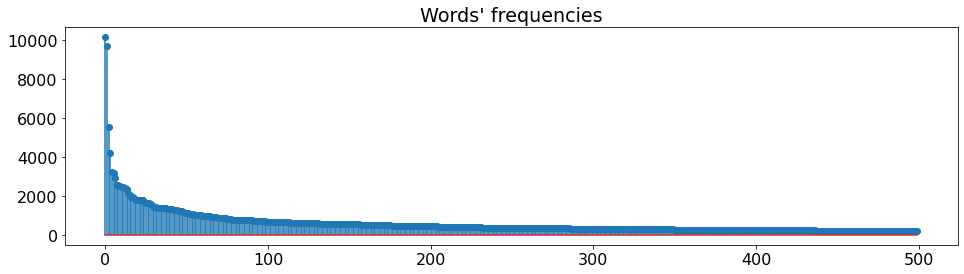

In [13]:
plt.figure(figsize=(16, 4))
plt.stem(-np.sort(-vFreq)[:500])
plt.title("Words' frequencies")
plt.show()

### Train Logistic Regression:
Let's use a **pipe**

In [15]:
from sklearn.pipeline        import make_pipeline
from sklearn.linear_model    import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing   import FunctionTransformer

lDocs = dData['review'].values
vY    = dData['sentiment']

oPreprocess = FunctionTransformer(lambda lDocs: PreprocessDocs(lDocs))
oPipe       = make_pipeline(oPreprocess, oBoW, LogisticRegression(max_iter=200))
oKFold      = KFold(10, shuffle=True)
vScore      = cross_val_score(oPipe, lDocs, vY, cv=oKFold)

print(f'Corss-valisation accuracy: {vScore}')
print(f'Mean accuracy:             {np.mean(vScore):1.3f} ± {np.std(vScore):1.3f}')

Corss-valisation accuracy: [0.85  0.858 0.828 0.848 0.82  0.85  0.848 0.848 0.846 0.862]
Mean accuracy:             0.846 ± 0.012


#### Same as before but with TF-IDF instead of BoW:

In [16]:
oPipe  = make_pipeline(oPreprocess, oBoW, TfidfTransformer(), LogisticRegression(max_iter=200))
vScore = cross_val_score(oPipe, lDocs, vY, cv=oKFold)

print(f'Corss-valisation accuracy: {vScore}')
print(f'Mean accuracy:             {np.mean(vScore):1.3f} ± {np.std(vScore):1.3f}')

Corss-valisation accuracy: [0.864 0.856 0.874 0.894 0.856 0.876 0.852 0.818 0.876 0.85 ]
Mean accuracy:             0.862 ± 0.020
